# OutoMobile Price Predict

<img src='otomobil.jpg'>

In [26]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [2]:
df = pd.read_csv('Automobile_data.csv')

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [11]:
df.price.isnull().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [14]:
df['price'] = df['price'].replace('?', 0)
df['price'] = df['price'].astype('int64')

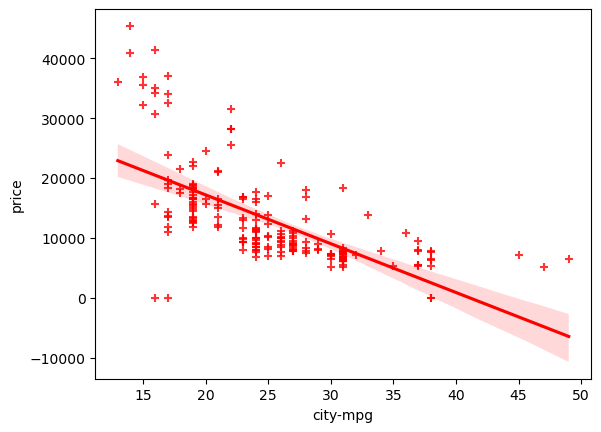

In [16]:
ax = sns.regplot(x='city-mpg', y='price', data=df, color='red', marker='+')

In [17]:
df['price'] = df['price'].replace(0, df['price'].mean())

<Axes: >

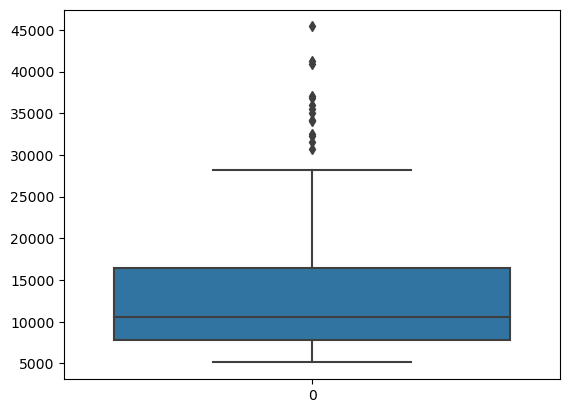

In [19]:
sns.boxplot(df.price)

In [23]:
df.corr()['price']

symboling           -0.082028
wheel-base           0.583379
length               0.683376
width                0.728409
height               0.134938
curb-weight          0.820823
engine-size          0.861719
compression-ratio    0.071166
city-mpg            -0.667642
highway-mpg         -0.690822
price                1.000000
Name: price, dtype: float64

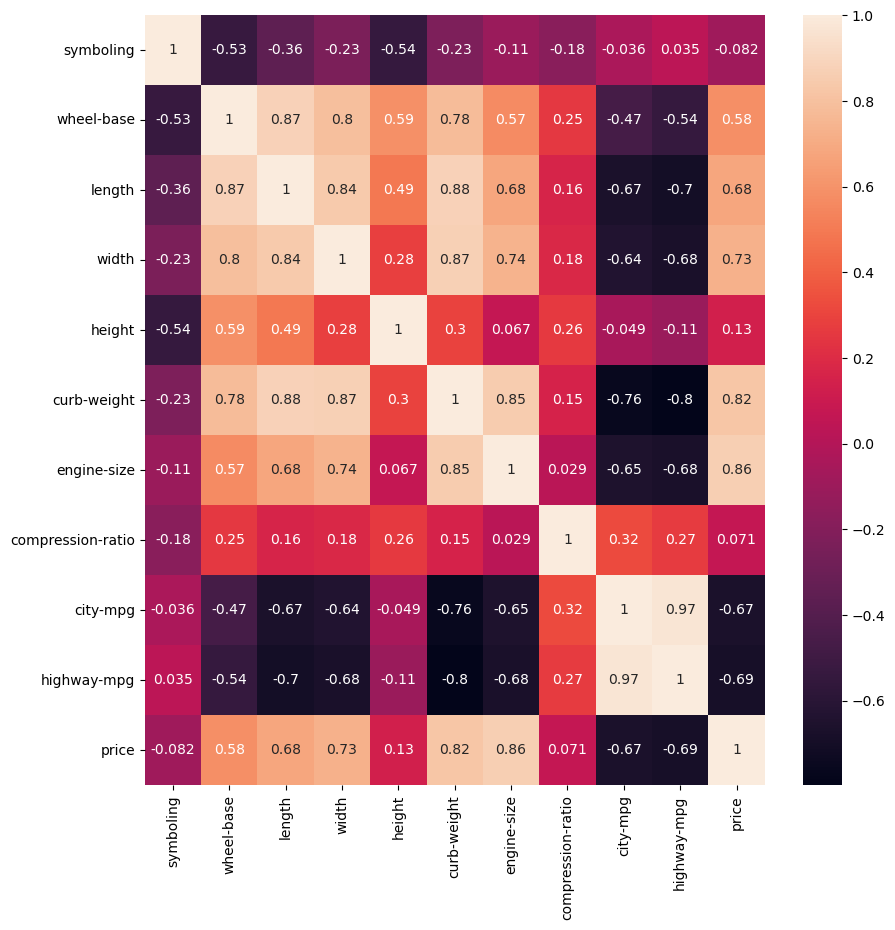

In [28]:
ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(),annot = True);

In [29]:
abs(df.corr()['price']).sort_values(ascending=False) 

price                1.000000
engine-size          0.861719
curb-weight          0.820823
width                0.728409
highway-mpg          0.690822
length               0.683376
city-mpg             0.667642
wheel-base           0.583379
height               0.134938
symboling            0.082028
compression-ratio    0.071166
Name: price, dtype: float64

In [30]:
df['num-of-cylinders'] = df['num-of-cylinders'].replace('four', 4)
df['num-of-cylinders'] = df['num-of-cylinders'].replace('six', 6)
df['num-of-cylinders'] = df['num-of-cylinders'].replace('five', 5)
df['num-of-cylinders'] = df['num-of-cylinders'].replace('three', 3)
df['num-of-cylinders'] = df['num-of-cylinders'].replace('twelve', 12)
df['num-of-cylinders'] = df['num-of-cylinders'].replace('two', 2)
df['num-of-cylinders'] = df['num-of-cylinders'].replace('eight', 8)
df['num-of-cylinders'] = df['num-of-cylinders'].astype('int64')

In [31]:
df['horsepower'] = df['horsepower'].replace('?',0 )
df['horsepower'] = df['horsepower'].astype('int64')
df['horsepower'] = df['horsepower'].replace(0, df['horsepower'].mean())

In [32]:
df['horsepower']

0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
       ...  
200    114.0
201    160.0
202    134.0
203    106.0
204    114.0
Name: horsepower, Length: 205, dtype: float64

In [33]:
df['num-of-doors'] = df['num-of-doors'].replace('?', "4")
df['num-of-doors'] = df['num-of-doors'].replace('four', "4")
df['num-of-doors'] = df['num-of-doors'].replace('two', "2")

# Classical Modelling

In [34]:
x = df[['make', 'fuel-type', 'aspiration', 'num-of-doors', 'length', 'width', 'height', 'engine-type', 'num-of-cylinders', 'fuel-system', 'horsepower']]
y= df['price']

In [38]:
x.shape,y.shape

((205, 42), (205,))

In [36]:
x = pd.get_dummies(x,drop_first=True) 

In [39]:
x.shape,y.shape

((205, 42), (205,))

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [42]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.1,random_state=13) #train_size=0.8

In [43]:
lr=LinearRegression()
regmodel=lr.fit(X_train, y_train)

In [45]:
y_pretest=lr.predict(X_test)

In [46]:
mean_squared_error(y_test,y_pretest)**0.5 #araba başına yapılan hata --8000 dolar

2641.069773916613

In [47]:
r2_score(y_test,y_pretest)

0.8003799448112147

In [51]:
x.shape,y.shape,Model_Predict.shape

((205, 42), (205,), (205, 42))